<a href="https://colab.research.google.com/github/Rocknroll-nerd/AGICourse/blob/main/4tasks_statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Решение задач
Нужно решить задачи используя как параметрический, так и непараметрический подход

## Задача 1
Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на миллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные (файл water.txt). 
Ответьте на следующие вопросы:
  
  - Постройте 95% доверительный интервал для средней годовой смертности в больших городах. Чему равна его нижняя граница? 
  - Есть ли разница в концентрации кальция в Южных и Северных городах?
  - Есть ли разница в продолжительность жизни населения Южных и Северных городов?

- Влияет ли качество воды на продолжительность жизни населения?  (А здесь уже все может быть не однозначно в постановке гипотезы)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn

In [ ]:
seaborn.set_style(style='white')

In [ ]:
cd /content/drive/My\ Drive/

/content/drive/My Drive


In [ ]:
water = pd.read_csv('water.txt', header=0, sep='\t', usecols=['location', 'town', 'mortality', 'hardness'])
#water.columns['location', 'town', 'mortality', 'hardness']
water

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


In [ ]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


In [ ]:
water.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


Постройте 95% доверительный интервал для средней годовой смертности в больших городах. Чему равна его нижняя граница?

Строим доверительный интервал с использованием бутстрапа

In [ ]:
np.percentile(water.mortality.values, 2.5)

1205.5

In [ ]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [ ]:
for_means=draw_bs_reps(water.mortality, np.mean, size=1000)
np.percentile(for_means, 2.5)

1477.077868852459

1. Нижняя граница доверительного интервала по среднегодовой смертности равна 1477.077868852459

In [ ]:
water[water.location == 'South'].hardness.describe()

count     26.000000
mean      69.769231
std       40.360682
min        5.000000
25%       40.250000
50%       75.500000
75%       99.750000
max      138.000000
Name: hardness, dtype: float64

In [ ]:
water[water.location != 'South'].hardness.describe()

count    35.000000
mean     30.400000
std      26.134494
min       6.000000
25%      12.500000
50%      17.000000
75%      44.000000
max      94.000000
Name: hardness, dtype: float64

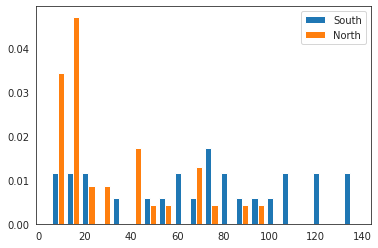

In [ ]:
plt.subplot(); plt.hist(x=[water[water.location == 'South'].hardness, water[water.location != 'South'].hardness], histtype='bar', bins=20, density=True)
plt.legend(['South', 'North'])
#plt.subplot(); plt.hist(water[water.location != 'South'].hardness, histtype='barstacked', density=True)

2. Жёсткость воды в северных городах ниже, чем в южных.

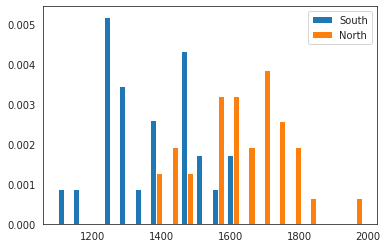

In [ ]:
plt.subplot(); plt.hist(x=[water[water.location == 'South'].mortality, water[water.location != 'South'].mortality], histtype='bar', bins=20, density=True)
plt.legend(['South', 'North'])

In [ ]:
water[water.location != 'South'].mortality.describe()

count      35.000000
mean     1633.600000
std       136.936911
min      1378.000000
25%      1557.500000
50%      1637.000000
75%      1718.000000
max      1987.000000
Name: mortality, dtype: float64

3. На севере морталити больше, чем на юге. Это значит, что продолжительность жизни на севере меньше, чем на юге.

Гипотеза: чем выше жёсткость воды, тем выше морталити. Однако тут же возникает вопрос, зависит ли вообще жесткость от смертности или на смертность может влиять что-то другое, посмотрим, существует ли зависимость смертности от  жесткости воды

In [ ]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Объедините два датасета с помощью функции  np.concatenate()
    data = np.concatenate((data1, data2))

    # Теперь перемешайте весь массив с помощью np.random.permutation()
    permuted_data = np.random.permutation(data)

    # Теперь переразбейте массив на два таких чтобы длина perm_sample_1 была равна длинне data1 , а perm_sample_2  - длинне data2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Размер массива
    n=len(data) 
    # Отсортируем все точки в массиве
    x=np.sort(data)

    # y это просто доля точек в интервале от 1 до n
    y = np.arange(1, n+1) / n

    return x, y

In [ ]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit( bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [ ]:
hard_mort_s = water[water.location == 'South'].hardness.values / water[water.location == 'South'].mortality.values
hard_mort_n = water[water.location != 'South'].hardness.values / water[water.location != 'South'].mortality.values

In [ ]:
hard_mort_s, hard_mort_n 

(array([0.08420209, 0.00341064, 0.06004619, 0.06181015, 0.05244253,
        0.01382488, 0.05967865, 0.07655502, 0.09256449, 0.01666667,
        0.12591241, 0.02639087, 0.00885515, 0.04507257, 0.1056394 ,
        0.09106383, 0.00336474, 0.06181319, 0.08171521, 0.04967129,
        0.03977725, 0.008     , 0.03929273, 0.03257529, 0.0820996 ,
        0.05454545]),
 array([0.01019185, 0.00777778, 0.01118707, 0.00641849, 0.00830105,
        0.00610874, 0.00683761, 0.01341382, 0.02508039, 0.02731092,
        0.02553685, 0.06816534, 0.00459242, 0.00571792, 0.05799873,
        0.01005657, 0.00846501, 0.00437637, 0.01525822, 0.02585194,
        0.01892081, 0.00348028, 0.00353774, 0.0075979 , 0.00969529,
        0.03079824, 0.00402617, 0.00936455, 0.04725898, 0.04144775,
        0.00834939, 0.0347561 , 0.04154476, 0.01230769, 0.05152395]))

In [ ]:
hard_s = water[water.location == 'South'].hardness.values
hard_n = water[water.location != 'South'].hardness.values
mort_s = water[water.location == 'South'].mortality.values
mort_n = water[water.location != 'South'].mortality.values

Text(0, 0.5, 'Hardness')

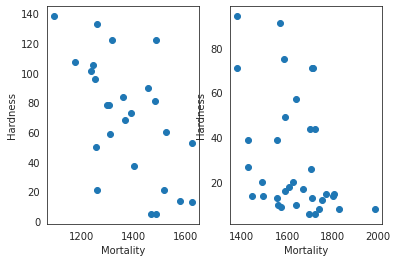

In [ ]:
plt.subplot(121)
plt.scatter(mort_s, hard_s)
plt.xlabel('Mortality')
plt.ylabel('Hardness')
plt.subplot(122)
plt.scatter(mort_n, hard_n)
plt.xlabel('Mortality')
plt.ylabel('Hardness')

In [ ]:
mort = water.mortality.values
hard = water.hardness.values

-0.13292453273257848 249.77692756960684
-0.13031235038781075 245.0522478255251


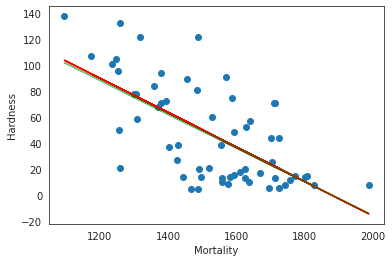

In [ ]:
plt.scatter(mort, hard)
plt.xlabel('Mortality')
plt.ylabel('Hardness')
slope, intercept = np.polyfit(mort, hard, 1)
print(slope, intercept)
x = mort
y = slope * mort + intercept
plt.plot(x, y, color='red')
slopes, intercepts = draw_bs_pairs_linreg(mort, hard, 50)
slope = np.mean(slopes)
intercept = np.mean(intercepts)
print(slope, intercept)
x = mort
y = slope * mort + intercept
plt.plot(x, y, color='green', alpha=0.5)

In [ ]:
slope, intercept = draw_bs_pairs_linreg(mort, hard, 50)
len(slope), len(intercept)
np.mean(intercept)

255.00681105884402

4. Зависимость наблюдаем, и она отрицательная: чем выше жёсткость воды, тем не выше (ниже) смертность. Гипотезу отвергаем.

## Задача 2

Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? 

Допустим, на уровне 95% вы хотите, чтобы доверительный интервал для доли был в пределах $\pm 0.01$ Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с этой точностью от неизвестного параметра доли $p$. Посмотрите, при каком значении $p$ нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?



для начала просимулируем нашу выборку, 50 испытуемых и 1 – счастливый обладатель гена

(array([49.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

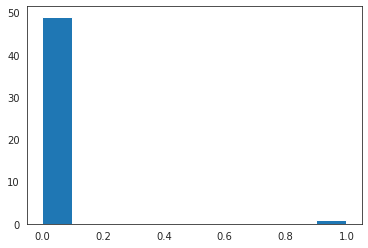

In [ ]:
lact = np.zeros(50)
lact[0] = 1
plt.hist(lact)

In [ ]:
np.percentile(lact, [2.5, 97.5])

array([0., 0.])

In [ ]:
share=np.empty(1000)

for i in range(1000):
  bs_sample = np.random.choice(lact, len(lact))
  s=np.sum(bs_sample)/len(bs_sample)
  share[i]=s

print(np.percentile(share, [2.5, 97.5]))

[0.   0.06]


Построили нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Нижняя граница равна 0 (значит есть такие выборки при бутстрапе, когда ни у одного не было гена.).

(array([35.8,  0. , 37.5,  0. , 19.4,  0. ,  5.7,  0. ,  1.5,  0.1]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
 <a list of 10 Patch objects>)

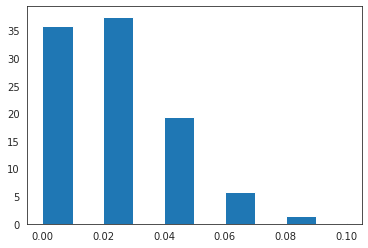

In [ ]:
plt.hist(share, density=True)

In [ ]:
size = 1000
def draw_lact(size):
  bs_lact = np.empty(size)
  for i in range(size):
    bs_lact[i] = bootstrap_replicate_1d(lact, lambda x:x) #change
    #np.random.choice(lact, size=len(lact))
  print(np.percentile(bs_lact, 2.5))
  plt.hist(bs_lact, density=True);

[0.   0.06]


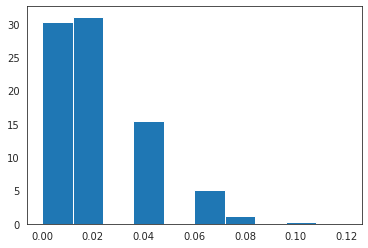

In [ ]:
draw_lact(10000)

In [ ]:
for p in range(2, 300, 10):
  size = 1000
  bs_lact = list()
  our_p = np.empty(size)
  bs_has = np.empty(size)
  lact = np.zeros(p)
  lact[0] = 1
  for i in range(size):
    bs_lact.append(np.random.choice(lact, size=len(lact)))
    bs_has[i] = np.sum(bs_lact[i]) / len(bs_lact[i])
    #bs_25[i] = np.percentile(bs_has[i], 2.5)
    #bs_975[i] = np.percentile(bs_has[i], 97.5)
  lower, upper = np.percentile(bs_has, [2.5, 97.5])
  if round(upper - lower, 2) <= 0.01:
    our_p[i] = 1/p
    print(p)
    print(round(upper - lower, 2))

202
0.01
212
0.01
222
0.01
232
0.01
242
0.01
252
0.01
262
0.01
272
0.01
282
0.01
292
0.01


Если "особенных" меньше 5 на тысячу человек, то это нам подходит.

 Посмотрите, при каком значении $p$ нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Посмотрите, при каком значении  p  нужно больше всего испытуемых - если пэ маленький, то и кол-во испытуемых нужно много!

## Задача 3

В пятилетнем рандомизированном исследовании Гарвардской медицинской школы 11037 испытуемых через день принимали аспирин, а ещё 11034 — плацебо. Исследование было слепым, то есть, испытуемые не знали, что именно они принимают.

За 5 лет инфаркт случился у 104 испытуемых, принимавших аспирин, и у 189 принимавших плацебо.

Постройте доверительный интервал для разницы в доле умерших от инфаркта между принимавшими и не принимавшими аспирин пациентами

In [ ]:
died_asp_num = 104 / 11037
died_no_num = 189 / 11034
died_asp = np.zeros(11037)
died_asp[:104] = 1
died_no = np.zeros(11034)
died_no[:189] = 1
np.abs(died_asp_num - died_no_num)

0.0077060239760047815

Доверительный интервал

In [ ]:
size = 1000
bs_asp_dif = np.empty(size)
for i in range(size):
  bs_died_asp = np.random.choice(died_asp, size=len(died_asp))
  bs_died_no = np.random.choice(died_no, size=len(died_no))
  bs_asp_dif[i] = np.abs(np.sum(bs_died_asp) / len(bs_died_asp) - np.sum(bs_died_no) / len(bs_died_no))
np.percentile(bs_asp_dif, [2.5, 97.5])

array([0.00462253, 0.01069653])

Для бернуллиевских случайных величин $X\sim Ber(p)$ часто вычисляют величину $\frac{p}{1-p}$ 
​	 , которая называется шансами (odds). Чтобы оценить шансы по выборке, вместо $p$ нужно подставить $\hat{p} $

​	 . Например, шансы инфаркта в контрольной группе, принимавшей плацебо, можно оценить как

$\frac{\frac{189}{11034}}{1-\frac{189}{11034}} = \frac{189}{11034-189}\approx 0.0174 $

Оцените, в этом эксперименте во сколько раз понижаются шансы инфаркта при регулярном приёме аспирина. Постройте 95% доверительный интервал для отношения шансов.

Можно ли сказать что-то об эффективности приема аспирина? Протестируйте  подходящую гипотезу всеми известными вам способами. 

In [ ]:
bs_odd_times = np.empty(size)
for i in range(size):
  bs_died_asp = np.random.choice(died_asp, size=len(died_asp))
  bs_died_no = np.random.choice(died_no, size=len(died_no))
  bs_odd_times[i] = ((np.sum(bs_died_no) / len(bs_died_no)) / (1 - np.sum(bs_died_no) / len(bs_died_no))) \
                           / ((np.sum(bs_died_asp) / len(bs_died_asp)) / (1 - np.sum(bs_died_asp) / len(bs_died_asp)))
  #bs_odd_times[i] = ((np.sum(bs_died_asp) / len(bs_died_asp)) / (1 - np.sum(bs_died_asp) / len(bs_died_asp))) \
  #                         / ((np.sum(bs_died_no) / len(bs_died_no)) / (1 - np.sum(bs_died_no) / len(bs_died_no)))
np.percentile(bs_odd_times, [2.5, 97.5])

array([1.47355563, 2.30008637])

Получается, что эффект от приема аспирина вырастает фактически в 2 раза

## Задача 4
По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса. 
Какие выводы из этого может сделать для себя руководство? 

А другая сеть получила, что только 22 из 50 работников испытывают существенный стресс. А руководство этой компании какие выводы может сделать?

А можно ли утведрждать что в обеих этих сетях уровень стресса одинаковый?

In [ ]:
rest1 = np.zeros(100)
rest1[:67] = 1
rest2 = np.zeros(50)
rest2[:22] = 1

In [ ]:
np.percentile(rest1, [2.5, 97.5]), np.percentile(rest2, [2.5, 97.5])

(array([0., 1.]), array([0., 1.]))

Слишком мало опрошенных работников. Из 100 получить 67 - хороший результат, что может говорить о несколько лучшей ситуации, чем по данным о 75%. Однако в случае 22 из 50 работников можно предположить, что были взяты только "нестрессующие", потому что выборка недостаточная для каких-либо выводов. 22 из 50 может не означать, что ситуация во второй сети лучше, чем в первой.
Доверительный интервал тоже различается, надо построить!

думаю, чтобы вычислить уровень значимости для каждой из двух выборок, нужно их пробутстрапить по средним, а затем посчитать для них p-value. Это сгладит возможный шанс случайности нашей выборки 

доверительный интервал в случае бутстрапа 67 из 100: [0.57 0.76]
доверительный интервал в случае бутстрапа 22 из 50: [0.3  0.58]


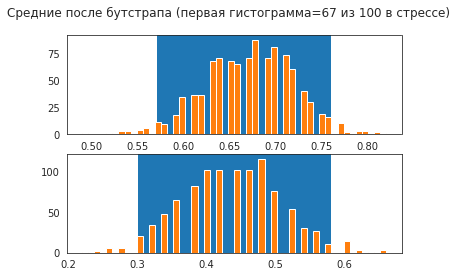

In [ ]:
#возьмем функцию для бутстрапа
def bs_rep(func, data=rest1):
  return func(np.random.choice(data, size=(len(data))))
#функция для симуляции большой выборки
def make_bs(func, data=rest1, size=1000): 
  bs_replicates = np.empty(size)
  for i in range(size):
    bs_replicates[i] = bs_rep(func, data)
  return bs_replicates

fig, axs = plt.subplots(2)
fig.suptitle('Средние после бутстрапа (первая гистограмма=67 из 100 в стрессе)')
stress1=make_bs(func=np.mean)#возможные для первого случая
stress2=make_bs(func=np.mean, data=rest2)#для второго
quant = np.percentile(stress1, [2.5, 97.5])#вычисляем квантили
#гистограма с доверительными интервалами
axs[0].hist(quant, bins=1, height=150)
quant_small = np.percentile(stress2, [2.5, 97.5])
axs[0].hist(stress1, bins=50)
axs[1].hist(quant_small, bins=1, height=150)
axs[1].hist(stress2, bins=50);
print('доверительный интервал в случае бутстрапа 67 из 100:', quant)
print('доверительный интервал в случае бутстрапа 22 из 50:', quant_small)

! Получить p-value! Какой шанс, что мы получили данные случайно.
Забутстрапить.

In [ ]:
rest1_bs = draw_bs_reps(rest1, np.mean, 10000)
np.percentile(rest1_bs, [2.5, 97.5])

array([0.58, 0.76])

In [ ]:
p0 = np.sum(rest1_bs >= 0.75) / len(rest1_bs)
p0

0.055

In [ ]:
#двусторонний p-value = 2min(P0,P)
double_tails = 2* min(p0, 1-p0)
double_tails

0.11